# Extracting and plotting Image Historgrams
In this notebook i experiment with extracting and plotting image historgrams. There are some methods for image comparison which use the image histrogram. I experiment with these metrics in the `comparing-historgrams.ipynb` notebook. But for now, lets just experiment with extracting and plotting image histograms.

Import the OpenCV & Numpy Libraries

In [3]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('./resources/img1.jpg')

## 1.Calculating and Plotting Histrograms
The calcHist() function calculates the historgram. OpenCV defaults to BRG so you need to provide the index for each channel

In [4]:
hist_blue = cv.calcHist([img],[0],None,[256],[0,256]) #[0] for blue channel
hist_red = cv.calcHist([img],[1],None,[256],[0,256]) #[1] for red channel
hist_green = cv.calcHist([img],[2],None,[256],[0,256]) #[2] for green channel

Plot the blue channel historgram

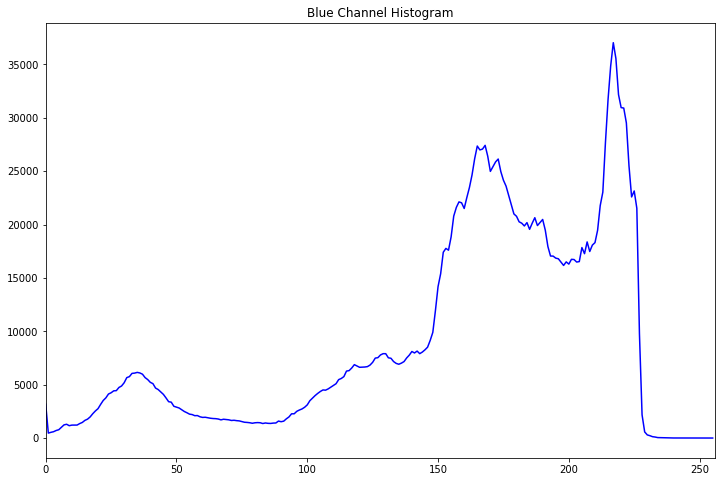

In [5]:
plt.figure(figsize=(12,8))
plt.plot(hist_blue, color = 'b')
plt.xlim([0,256])
plt.title("Blue Channel Histogram")
plt.savefig('img_blue_histogram.png')
plt.show()

Plot the red channel historgram

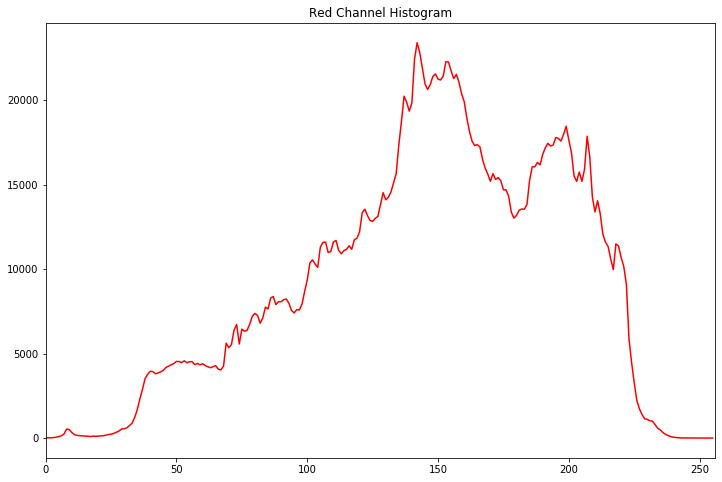

In [6]:
plt.figure(figsize=(12,8))
plt.plot(hist_red, color = 'r')
plt.xlim([0,256])
plt.title("Red Channel Histogram")
plt.savefig('img_red_histogram.png')
plt.show()

Plot the green channel historgram

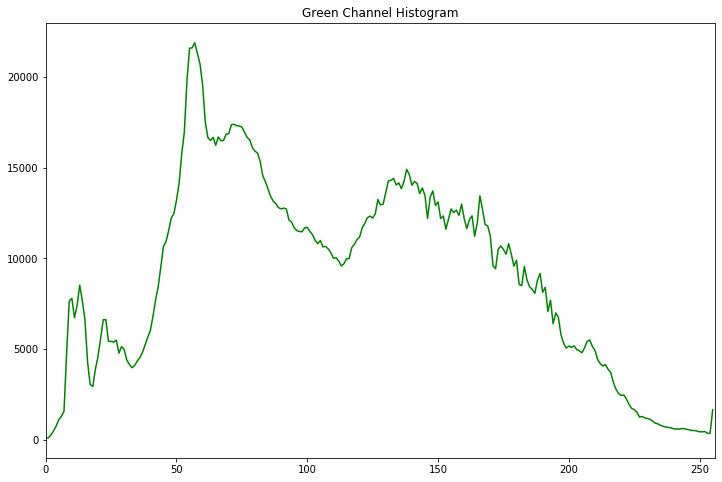

In [7]:
plt.figure(figsize=(12,8))
plt.plot(hist_green, color = 'g')
plt.xlim([0,256])
plt.title("Green Channel Histogram")
plt.savefig('img_green_histogram.png')
plt.show()

## 2. Histogram Equalisation

Convert ther image to grayscale

In [8]:
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

Calculate and plot the histogram for the grayscale image

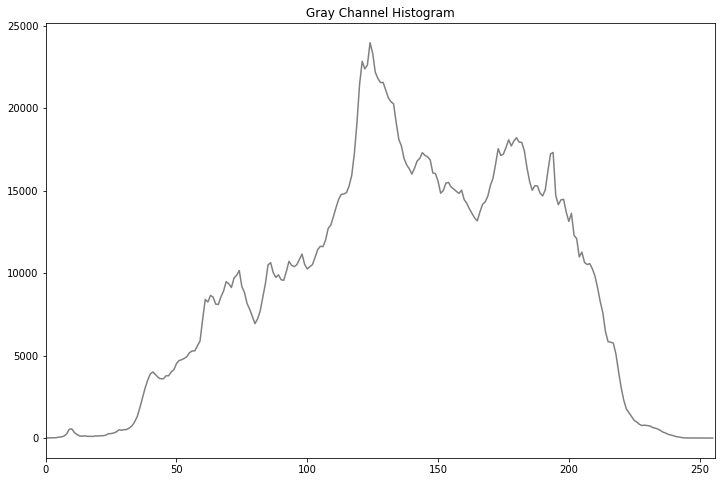

In [9]:
plt.figure(figsize=(12,8))
hist_gray = cv.calcHist([img_gray],[0],None,[256],[0,256])
plt.plot(hist_gray, color = 'gray')
plt.xlim([0,256])
plt.title("Gray Channel Histogram")
plt.savefig('img_gray_histogram.png')
plt.show()

Define the get_cummulatriveDist() function to calculate the cummulative distribution of intensity

In [10]:
def getCummulativeDist(hist):
    c = [] #cummulative distribution
    s = 0
    for i in range(0, len(hist)):
        s = s + hist[i]
        c.append(s)
    return c

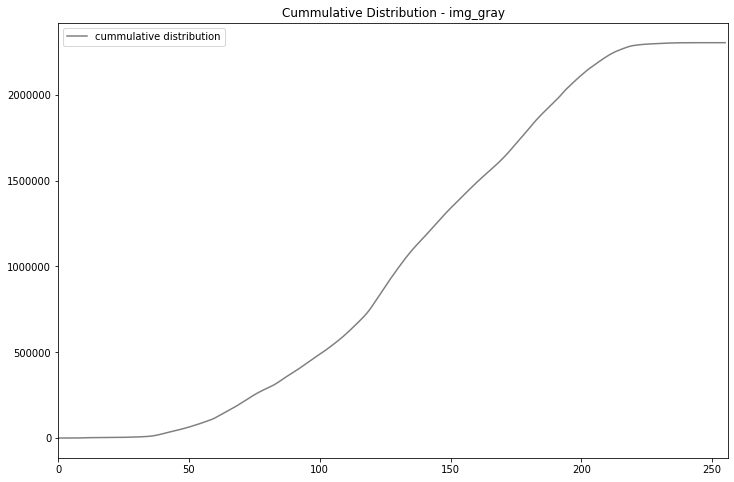

In [11]:
c = getCummulativeDist(hist_gray)
plt.figure(figsize=(12,8))
plt.plot(c, label = 'cummulative distribution', color = 'gray')
plt.legend(loc="upper left")
plt.xlim([0,256])
plt.title("Cummulative Distribution - img_gray")
plt.savefig('img_gray_cummulative_distribution.png')
plt.show()

In [12]:
img_equ = cv.equalizeHist(img_gray)

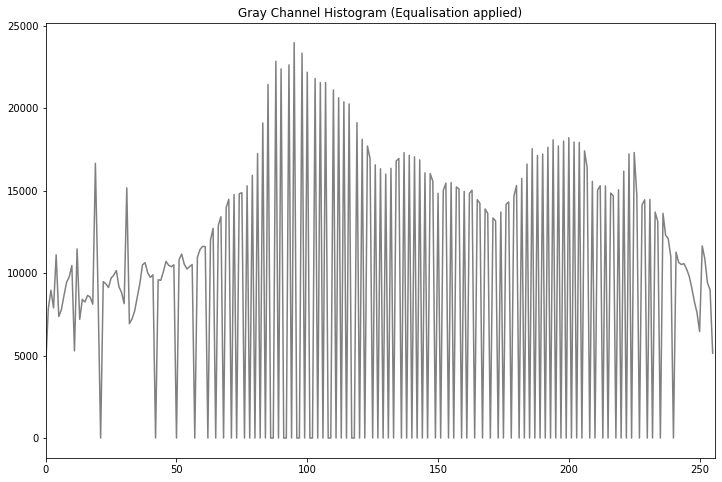

In [13]:
hist_equ = cv.calcHist([img_equ],[0],None,[256],[0,256])
plt.figure(figsize=(12,8))
plt.plot(hist_equ, color='gray')
plt.xlim([0,256])
plt.title("Gray Channel Histogram (Equalisation applied)")
plt.savefig('img_equ_histogram.png')
plt.show()

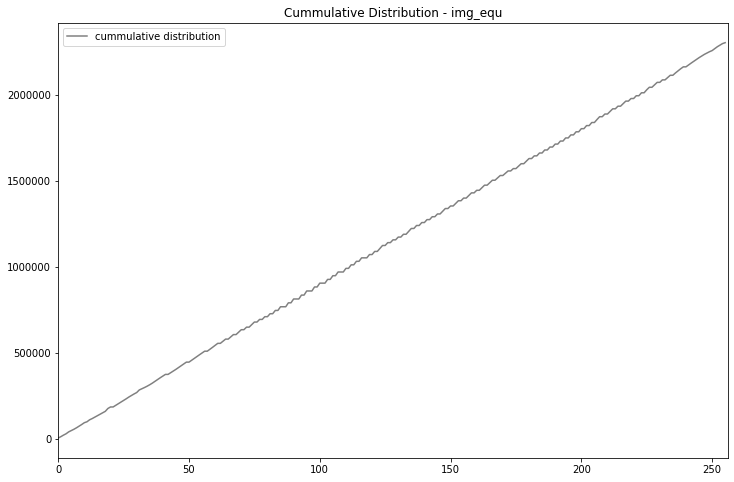

In [14]:
c = getCummulativeDist(hist_equ)
plt.figure(figsize=(12,8))
plt.plot(c, label = 'cummulative distribution', color = 'gray')
plt.legend(loc="upper left")
plt.xlim([0,256])
plt.title("Cummulative Distribution - img_equ")
plt.savefig('img_equ_cummulative_distribution.png')
plt.show()

Stack images side by side to see the difference made by historgram equalisation

In [15]:
img_equalisation = np.hstack((img_gray, img_equ)) #stacking images side-by-side
cv.imwrite('img_equalisation.png', img_equalisation) #writing the stacked image to file

True